In [55]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

In [61]:
path = "../hpa/"
img_folder = path+"train"
train_csv = pd.read_csv(img_folder+".csv",)

train_csv.head(3)
# os.listdir(img_folder)

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5


(512, 512)


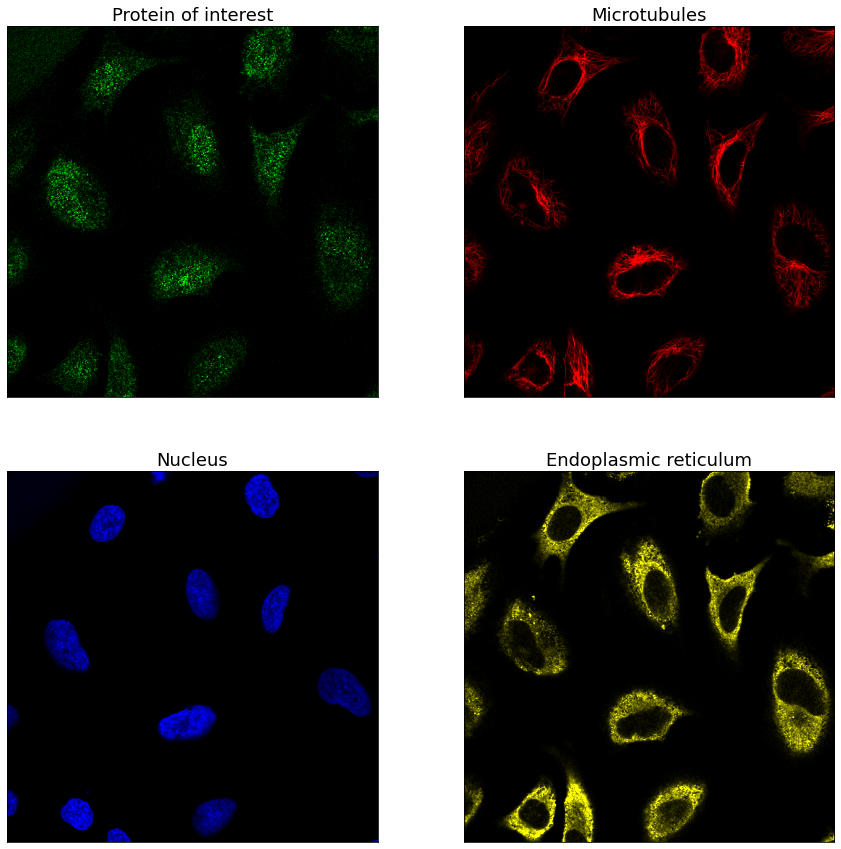

In [60]:
# source: https://www.kaggle.com/jitshil143/human-protein-atlas
from matplotlib.colors import LinearSegmentedColormap

def show_image(img_path):
    
    sns.reset_orig()

    #get image id
#     img_name = train_csv.loc[1, "Id"]
    img_name = img_path

    cdict1 = {  'red' :((0.0,  0.0, 0.0),
                       (1.0,  0.0, 0.0)),

                'green':((0.0,  0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0)),

                'blue':((0.0,  0.0, 0.0),
                       (1.0,  0.0, 0.0))}

    cdict2 = {'red':   ((0.0,  0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0)),

             'green': ((0.0,  0.0, 0.0),
                       (1.0,  0.0, 0.0)),

             'blue':  ((0.0,  0.0, 0.0),
                       (1.0,  0.0, 0.0))}

    cdict3 = {'red':   ((0.0,  0.0, 0.0),
                       (1.0,  0.0, 0.0)),

             'green': ((0.0,  0.0, 0.0),
                       (1.0,  0.0, 0.0)),

             'blue':  ((0.0,  0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0))}

    cdict4 = {'red': ((0.0,  0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0)),

             'green': ((0.0,  0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0)),

             'blue':  ((0.0,  0.0, 0.0),
                       (1.0,  0.0, 0.0))}
    
    plt.register_cmap(cmap=LinearSegmentedColormap('GN', cdict1))
    plt.register_cmap(cmap=LinearSegmentedColormap('RD', cdict2))
    plt.register_cmap(cmap=LinearSegmentedColormap('BL', cdict3))
    plt.register_cmap(cmap=LinearSegmentedColormap('YL', cdict4))

    #get each image channel as a greyscale image (second argument 0 in imread)
    green = cv2.imread(os.path.join(img_folder, img_name+'_green.png'),0)
    red = cv2.imread(os.path.join(img_folder,img_name+'_red.png'),0)
    blue = cv2.imread(os.path.join(img_folder,img_name+'_blue.png'),0)
    yellow = cv2.imread(os.path.join(img_folder,img_name+'_yellow.png'),0)
    print(yellow.shape)


    #display each channel separately
    fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(15, 15))
    
    cmap = plt.get_cmap('GN')
    ax[0, 0].imshow(green,cmap=cmap)
    ax[0, 0].set_title("Protein of interest", fontsize=18)
    
    cmap = plt.get_cmap('RD')
    ax[0, 1].imshow(red, cmap=cmap)
    ax[0, 1].set_title("Microtubules", fontsize=18)
    
    ax[1, 0].imshow(blue, cmap="BL")
    ax[1, 0].set_title("Nucleus", fontsize=18)
    
    ax[1, 1].imshow(yellow, cmap="YL")
    ax[1, 1].set_title("Endoplasmic reticulum", fontsize=18)
    for i in range(2):
        for j in range(2):
            ax[i, j].set_xticklabels([])
            ax[i, j].set_yticklabels([])
            ax[i, j].tick_params(left=False, bottom=False)
    plt.show()
    

show_image(train_csv.iloc[120,0])